In [2]:
import pandas as pd
#import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
#from datetime import datetime

# Use directory path for the file location of the data
os.chdir("C:\\Users\\deepp\\Desktop\\GitHub")


# Reading the excel file from the dataset
superstore = pd.read_excel('Superstore.xls')

In [4]:
# Data Cleaning
# Rounds the numbers in the 'Profit' column
superstore['Profit'] = round(superstore['Profit'], 2)

# Renames columns
superstore = superstore.rename(columns={'Order Date':'Order_Date',\
                                        'Product Category':'Product_Category',\
                                        'Shipping Cost':'Shipping_Cost',\
                                        'Ship Mode':'Ship_Mode',
                                        'Order Quantity':'Order_Quantity',
                                        'Shipping Cost':'Shipping_Cost'})


[Text(0.5, 0, 'Discount Amount')]

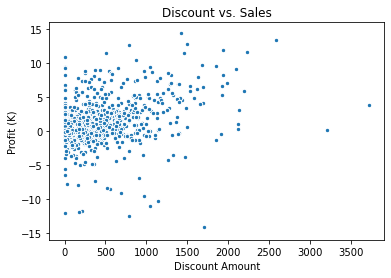

In [5]:
# Part 1

# Finds the discount total
superstore['DT'] = round(superstore['Sales']*superstore['Discount'], 2)

# Creates a profit column in thousands of dollars
superstore['Profit (K)'] = superstore['Profit']/1000

# Creates a scatter plot of profit vs. total discount
plot1 = superstore.plot.scatter('DT','Profit (K)', edgecolors= "white", 
                                ylim=(-16,16), title = 'Discount vs. Sales')
plot1.set(xlabel="Discount Amount")
# plt.savefig('Q1.pdf')

<ipython-input-6-ba2a93d6a010>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superstore['Profit Marker'][(superstore['Profit'] > 0)] = 'Positive'


Text(0.5, 0, 'Discount Amount')

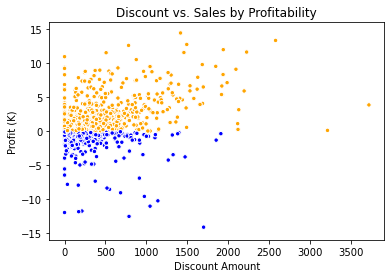

In [6]:
# Part 2
# Sets a category for profit
superstore['Profit Marker'] = 'Negative'
superstore['Profit Marker'][(superstore['Profit'] > 0)] = 'Positive'

plot2 = superstore.plot.scatter('DT','Profit (K)', ylim=(-16,16), 
              edgecolors= "white", title='Discount vs. Sales by Profitability', 
              c=superstore['Profit Marker'].map(dict(
                  Positive='orange', Negative='blue')))
plot2.set_xlabel('Discount Amount')

Text(0.5, 1.0, 'Month of Order Date vs. Sales')

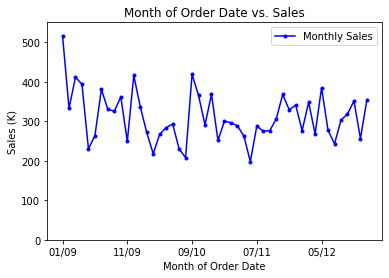

In [7]:
# Part 3
superstore['Sales (K)']= superstore['Sales']/1000
superstore['Order Year']= superstore.Order_Date.dt.year
superstore['Order Month']= superstore.Order_Date.dt.strftime('%m')
Q3 = superstore.groupby(['Order Month','Order Year',
                         superstore.Order_Date.dt.strftime('%m/%y')]
                        )['Sales (K)'].sum().reset_index(name='Monthly Sales')

months=['01','02','03','04','05','06','07','08','09','10','11','12']
Q3['Order Month'] = pd.CategoricalIndex(Q3['Order Month'],
                                        categories=months, ordered=True)

Q3_sort=Q3.sort_values(["Order Year","Order Month"])

plot3= Q3_sort.plot.line(x='Order_Date',y='Monthly Sales',
                         marker='.',color='b',ylim=(0,550))
plot3.set_xlabel('Month of Order Date')
plot3.set_ylabel('Sales (K)')
plt.title('Month of Order Date vs. Sales')

Text(0.5, 1.0, 'Month of Order Date vs. Sales by Profit')

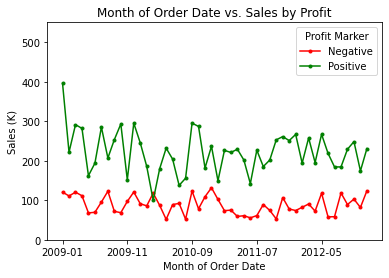

In [8]:
# Part 4
Q4 = superstore.groupby(['Profit Marker',
                         'Order Month','Order Year',
                         superstore.Order_Date.dt.strftime('%Y-%m')]
                        )['Sales (K)'].sum().reset_index(name='Monthly Sales')


Q4a= Q4.pivot(index='Order_Date', columns='Profit Marker',
              values='Monthly Sales')
plot4= Q4a.plot(marker='.',ylim=(0,550),color=['red','green'])
plot4.set_xlabel('Month of Order Date')
plot4.set_ylabel('Sales (K)')
plt.title('Month of Order Date vs. Sales by Profit')

<ipython-input-9-fe167472289c>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


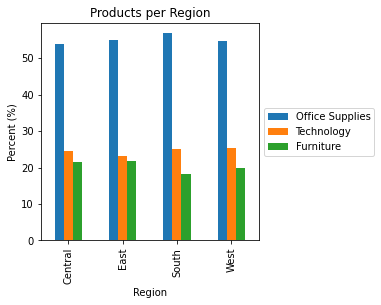

In [9]:
superstore['Product_Count']= superstore['Product_Category']
Q5 = pd.crosstab(superstore['Region'],superstore['Product_Category'],
                 margins=True)

Q5['Furniture %']= (Q5['Furniture']/Q5['All'])*100
Q5['Office Supplies %']= (Q5['Office Supplies']/Q5['All'])*100
Q5['Technology %']= (Q5['Technology']/Q5['All'])*100

Q5_filter=Q5[['Office Supplies %','Technology %','Furniture %']]
Q5a=Q5_filter[:-1].reset_index()


plot5 = Q5a.plot(x='Region',
                 y=['Office Supplies %','Technology %','Furniture %'],
                 kind='bar')
plot5.set_ylabel('Percent (%)')

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.65, box.height])
legend_x = 1
legend_y = 0.5
plt.legend(["Office Supplies", "Technology","Furniture"], 
           loc='center left', bbox_to_anchor=(legend_x, legend_y))
plt.title('Products per Region')
# plt.savefig('Q5.pdf', bbox_inches='tight')
plt.show()

<ipython-input-10-f1d098802530>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superstore['Ship_Cost_Cat'][(superstore['Shipping_Cost'] < 60)] = 'expensive'
<ipython-input-10-f1d098802530>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superstore['Ship_Cost_Cat'][(superstore['Shipping_Cost'] < 40)] = 'fair'
<ipython-input-10-f1d098802530>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superstore['Ship_Cost_Cat'][(superstore['Shi

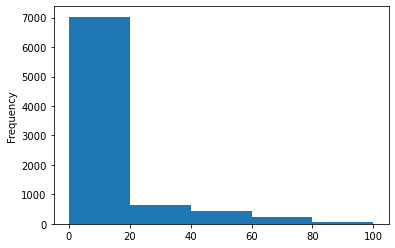

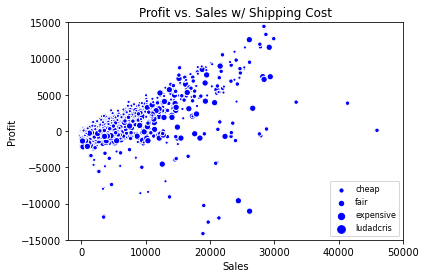

In [10]:
#Part 6

# Checking out the distriubtion of Shipping Cost
plot6a = superstore['Shipping_Cost'].plot.hist(bins=[0,20,40,60,80,100])

# Assigns category to shipping cost
superstore['Ship_Cost_Cat'] = 'ludadcris'
superstore['Ship_Cost_Cat'][(superstore['Shipping_Cost'] < 60)] = 'expensive'
superstore['Ship_Cost_Cat'][(superstore['Shipping_Cost'] < 40)] = 'fair'
superstore['Ship_Cost_Cat'][(superstore['Shipping_Cost'] < 20)] = 'cheap'

plot6 = superstore.plot.scatter('Sales','Profit', edgecolors= "white",
            title = 'Profit vs. Sales w/ Shipping Cost', rasterized=True,
            s = superstore['Ship_Cost_Cat'].map(
                dict(ludacris=60, expensive=40, fair=20, cheap=10)),
            color='blue'
            ,xlim=(-2000,50000),ylim=(-15000,15000))
# Comment out above line and add parenthesis after color='blue' to see 
# all points which shows one major outlier.

# Creating customized legend to display point sizes
s1 = plt.scatter([],[], s=10, marker='o', color='blue')
s2 = plt.scatter([],[], s=20, marker='o', color='blue')
s3 = plt.scatter([],[], s=40, marker='o', color='blue')
s4 = plt.scatter([],[], s=60, marker='o', color='blue')
plt.legend((s1,s2,s3,s4),
       ('cheap', 'fair', 'expensive','ludadcris'),
       scatterpoints=1,
       loc='lower right',
       ncol=1,
       fontsize=8)

# plt.savefig('Q6.pdf', dpi=300, bbox_inches='tight')
plt.show()

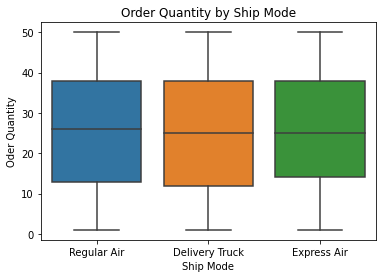

In [11]:
# Part 7
Q7 = superstore[['Ship_Mode','Order_Quantity']]

# box plot using seaborn. Outliers/fliers not showing??
plot7 = sns.boxplot(x='Ship_Mode',y='Order_Quantity',
                    data=Q7, showfliers=True)
plot7.set(xlabel='Ship Mode', ylabel='Oder Quantity',
            title='Order Quantity by Ship Mode')
# plt.savefig('Q7.pdf')
plt.show()